
My 1st study of gaussian process using scikit-learn.
The code is taken from the following site (in Japanese).
- https://kusanohitoshi.blogspot.jp/2017/01/gaussian-process.html



In [14]:
import sklearn.gaussian_process as GP
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [10]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [26]:
#...First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
#...Observations
y = f(X).ravel()
#...Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

`np.atleast_2d()` creates a 2D array which is necessary for the input of `gp.fit()`.
The reason why `gp.fit()` requires 2D array is that the number of features can be over 1D.
So the input of `gp.fit()` has to be 2D array of (num of data points, num of features).

In [19]:
#...Instanciate a Gaussian Process model
gp = GP.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1)
#...Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)
#...Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x,  eval_MSE=True)


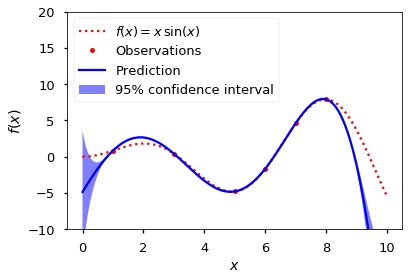

In [20]:
#...Plot the function, the prediction and the 95% confidence interval based on the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

Here it is difficult for me to understand the arguments of `plt.fill()`.
`np.concatenate()` combines two numpy arrays and `x[::-1]` flips the order of the array, so the np.concatenate() does like the following:

In [33]:
print np.concatenate([X,X[::-1]])

[[ 1.]
 [ 3.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 3.]
 [ 1.]]


So the `plt.fill()` receives an x array of variable back and forth, and a corresponding y array, the fill up the region closed by the y array.